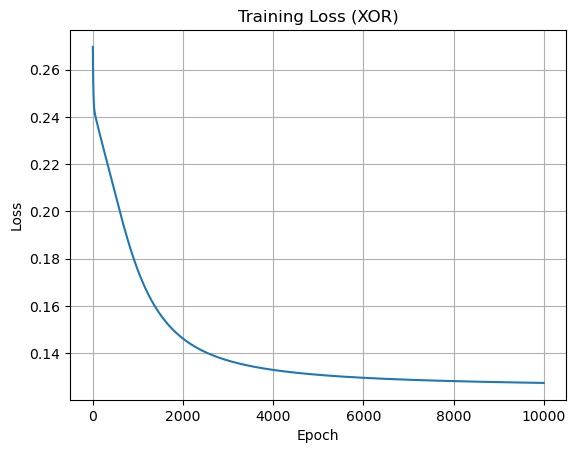


Final Predictions:
Input: [0 0] → Predicted: 0.0384, Actual: 0
Input: [0 1] → Predicted: 0.4986, Actual: 1
Input: [1 0] → Predicted: 0.9520, Actual: 1
Input: [1 1] → Predicted: 0.5043, Actual: 0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

np.random.seed(0)
input_size, hidden_size, output_size = 2, 2, 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    error = y - a2
    d_output = error * sigmoid_derivative(a2)
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(a1)

    W2 += np.dot(a1.T, d_output) * 0.1
    b2 += np.sum(d_output, axis=0, keepdims=True) * 0.1
    W1 += np.dot(X.T, d_hidden) * 0.1
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * 0.1

plt.plot(losses)
plt.title("Training Loss (XOR)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

print("\nFinal Predictions:")
for i in range(len(X)):
    z1 = np.dot(X[i], W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    print(f"Input: {X[i]} → Predicted: {a2[0][0]:.4f}, Actual: {y[i][0]}")
